In [16]:
from google.cloud import vision
import io
import glob
import os
import os.path
import cv2
from matplotlib import pyplot as plt
import numpy as np
from IPython.display import clear_output, Image, display
from io import BytesIO
import PIL.Image
from google.cloud.vision import types
###### before running, please run export GOOGLE_APPLICATION_CREDENTIALS='/path/to/your/client_secret.json'
#export GOOGLE_APPLICATION_CREDENTIALS='/c/Users/poorv/Downloads/ocr_scripts/keys/direct-outlook-270501-c05c2d97d1c6.json'
#echo $GOOGLE_APPLICATION_CREDENTIALS 
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "C:/Users/poorv/Downloads/ocr_scripts/keys/direct-outlook-270501-c05c2d97d1c6.json"

In [4]:
def di(*args):
    fig2 = plt.figure(figsize = (15,10))
    num_args = len(*args)
    imgs = args[0]
    if num_args == 1:
        plt.subplot(111)
        plt.imshow(imgs[0],cmap = 'gray')
        plt.show()
    elif num_args == 2:
        plt.subplot(121)
        plt.imshow(imgs[0],cmap = 'gray')
        plt.subplot(122)
        plt.imshow(imgs[1],cmap = 'gray')
        plt.show()
    else:
        #i.e. 3 images
        plt.subplot(131)
        plt.imshow(imgs[0],cmap = 'gray')
        plt.subplot(132)
        plt.imshow(imgs[1],cmap = 'gray')
        plt.subplot(133)
        plt.imshow(imgs[2],cmap = 'gray')
        plt.show()

def d1(im):
    fig1 = plt.figure(figsize = (20,20)) # create a 5 x 5 figure 
    plt.subplot(111)
    plt.imshow(im)
    plt.show()

<Figure size 1080x720 with 0 Axes>

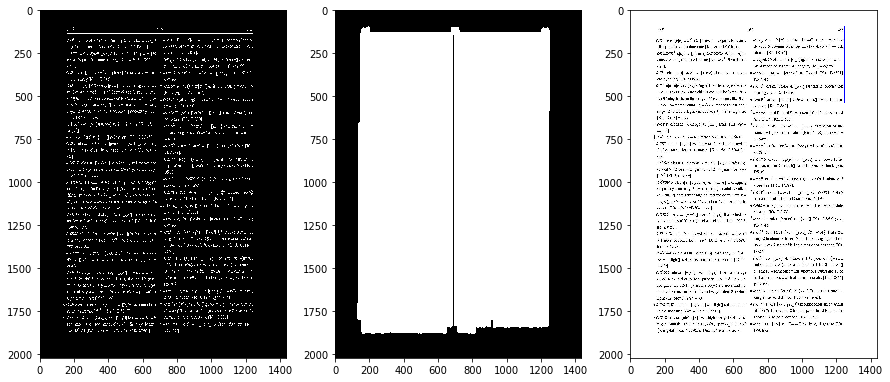

In [5]:
pg188 = "jpgs/output-190-to-190.jpg"
os.path.isfile(pg188)
tc = cv2.imread(pg188) 
fig2 = plt.figure(figsize = (15,10)) # create a 5 x 5 figure 

im = tc.copy()
im_gray=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(im_gray,127,255,cv2.THRESH_BINARY_INV)
thresh = cv2.GaussianBlur(thresh,(1, 1),0)
edges = cv2.Canny(thresh,50,100,apertureSize = 3)

rho = 1  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 1  # minimum number of votes (intersections in Hough grid cell)
min_line_length = 1  # minimum number of pixels making up a line
max_line_gap = 1000  # maximum gap in pixels between connectable line segments
# line_image = np.copy(img) * 0  # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)

vert_line = []
vert_avg = 0
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(thresh,(x1,y1),(x2,y2),(255,0,0),15)
        if x1 == x2:
            vert_avg+=x1
            vert_line.append(line)

# print(vert_line)
        
struct = cv2.getStructuringElement(cv2.MORPH_RECT, (1,1))
thresh = cv2.dilate(thresh, struct, anchor=(-1, -1), iterations=100)

contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
minArea=2000 #nothing 
for cnt in contours:
    area=cv2.contourArea(cnt)
    if(area>minArea):
        rect = cv2.minAreaRect(cnt)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        cv2.drawContours(im,[box],0,(0,0,255),1)

imgs = (edges, thresh, im)
di(imgs)

In [6]:
av = vert_avg/len(vert_line)

In [7]:
height, width, channels = im.shape
right = tc[0:height, int(av):width] #this line crops\n",
left = tc[0:height, 0:int(av)]


# OCR

In [33]:
def dtlh(path, lh):
    """Detects text in the file."""
    client = vision.ImageAnnotatorClient()
    if type(path) == str:
        with io.open(path, 'rb') as image_file:
            content = image_file.read()
            image = vision.types.Image(content=content)
    else:
        image = types.Image(content=cv2.imencode('.jpg', path)[1].tostring())
        
    response = client.text_detection(
    image=image,
    image_context={"language_hints": lh},  # Bengali
    )
    texts = response.text_annotations
    print(texts[0].description)
    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))
#dtlh(pg188, ["kn"]) string_path example 
#dtlh(left, ["kn"]) cv2 example

In [34]:
dtlh(left, ["kn"])

ಎಳೆ!
ಎಳೆele [ele] ಎ vt. [move] 1 to pull, to drag 2
(fg.) to attract, to fascinate [Ka. ere *D504(a)].
ಎಳೆಯಿಸು' eleyisu [elejisu] ಎಳೆ ಯಿಸು vt. [move] to
cause to pull, to cause to drag [Ka. ಎಳೆ*D504(a) +
-{su].
ಎಳೆ ele [ele] ಎಲೆ 7. [three] thread of a Woven
cloth, string [Ka. *D506].
ಎಳೆ ele [e[೬] ಎಳ (adj.) [age] 1 tender in age (before
twelve years and after childhood and before puber-
ty) T being in the earliest stage of development, like [ ಎ-
ಮಗು “very Srmall child,” – ಎಳೆಯ untipe fruit in early
stage 2 tender 3 light (in Colour) ಎಳೆಗೆಂಪು light red
[Ka. Ds13] = ಎಳೆ
೧ಎಳೆನಗೆ elenage [elenage] ft. [bio.] smile [Ka. ete +
fOg].
*ಎಳೆ ele [ele] 7. [arch.] rafter (NK.) [Ka. D854A].
ಎಳೆತ eleta [elete] 12, [move] 1 pulling, drawing
2 (fig) attraction, fascination [Ka. ee D504(a) +
-ta].
ಎಳೆತನ eletana [eletane] ಎಳತನ 1 [age) tender age
(about 8-12 years for girls and 12-14 years for boys
[e! D513+ -tatta].
ಎಳೆದಾಟ eledata [e[edit] 1. [move] 1 dragging
or pulling imutually 2 [mind) (hg, mental c